<img align="right" src = "https://raw.githubusercontent.com/arsilva87/statsbook/main/figs/figura_thumbnail.png" width="25%" height="25%">

Códigos em R do livro: **Estatística Decodificada** (Silva, A.R. 2021) 

Capítulo 17: **Experimentos multifatores**
____

**Estruturas dos fatores, tipos de efeito e interação**

In [1]:
# dados
cana <- read.csv("https://raw.githubusercontent.com/arsilva87/statsbook/main/datasets/vinhaca.csv")
cana$vinhacaf <- ordered(cana$vinhaca)
cana$bloco <- as.factor(cana$bloco)
str(cana)

'data.frame':	36 obs. of  5 variables:
 $ variedade: Factor w/ 3 levels "A","B","C": 1 2 3 1 2 3 1 2 3 1 ...
 $ vinhaca  : int  0 0 0 0 0 0 0 0 0 500 ...
 $ bloco    : Factor w/ 3 levels "1","2","3": 1 1 1 2 2 2 3 3 3 1 ...
 $ producao : int  69 65 71 66 67 73 68 64 70 72 ...
 $ vinhacaf : Ord.factor w/ 4 levels "0"<"500"<"1000"<..: 1 1 1 1 1 1 1 1 1 2 ...


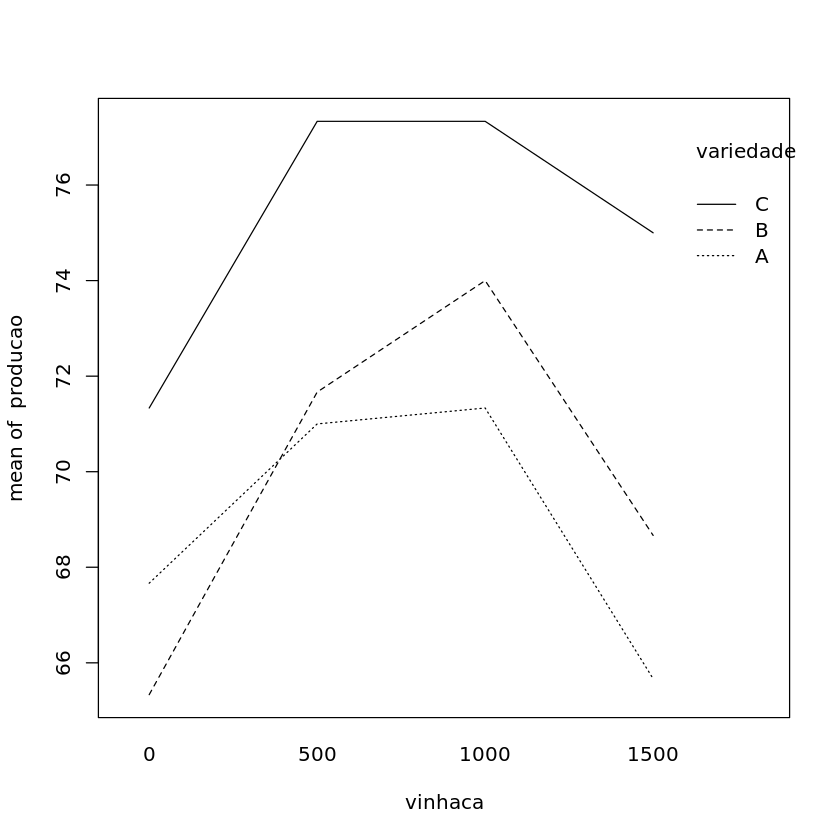

In [2]:
# gráfico de interação
with(cana, interaction.plot(x.factor = vinhaca, 
                            trace.factor = variedade, response = producao))

____
**Experimentos fatoriais**

In [3]:
# Ajuste do modelo e tabela de ANOVA
lm.vinhaca <- lm(producao ~ bloco + variedade * vinhacaf, data = cana)
anova(lm.vinhaca)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
bloco,2,3.388889,1.694444,0.7668571,4.764905e-01
variedade,2,278.222222,139.111111,62.9577143,7.879547e-10
vinhacaf,3,226.305556,75.435185,34.1398095,1.870630e-08
variedade:vinhacaf,6,39.777778,6.629630,3.0003810,2.689435e-02
Residuals,22,48.611111,2.209596,NA,NA


In [4]:
# teste de normalidade residual
res <- residuals(lm.vinhaca)
shapiro.test(res)


	Shapiro-Wilk normality test

data:  res
W = 0.93231, p-value = 0.02943


In [5]:
# teste de homocedasticidade
bartlett.test(res ~ factor(vinhacaf:variedade), data = cana)


	Bartlett test of homogeneity of variances

data:  res by factor(vinhacaf:variedade)
Bartlett's K-squared = 2.5247, df = 11, p-value = 0.9956


In [27]:
# análise da interação: comparação de variedades na dose 0 de vinhaça
library(ExpDes)
with(subset(cana, vinhaca == 0),
     snk(y = producao, trt = variedade, DFerror = 22, SSerror = 48.611, alpha = 0.05))


Attaching package: ‘ExpDes’


The following object is masked from ‘package:stats’:

    ccf





Student-Newman-Keuls's test (SNK)
------------------------------------------------------------------------
Groups  Treatments  Means
a 	 C 	     71.33333 
 b 	 A 	     67.66667 
 b 	 B 	     65.33333 
------------------------------------------------------------------------


In [28]:
# comparação de variedades na dose 500 de vinhaça
with(subset(cana, vinhaca == 500),
     snk(y = producao, trt = variedade, DFerror = 22, SSerror = 48.611, alpha = 0.05))


Student-Newman-Keuls's test (SNK)
------------------------------------------------------------------------
Groups  Treatments  Means
a 	 C 	     77.33333 
 b 	 B 	     71.66667 
 b 	 A 	     71 
------------------------------------------------------------------------


In [29]:
# Análise completa (ANOVA + análise de interação) com a função fat2.rbd do ExpDes
with(cana,
      fat2.rbd(factor1 = variedade, factor2 = vinhaca, 
      block = bloco, resp = producao, 
      quali = c(TRUE, FALSE), 
      mcomp = "snk", fac.names = c("Variedade", "Dose"), 
      sigT = 0.05, sigF = 0.05))

------------------------------------------------------------------------
Legend:
FACTOR 1:  Variedade 
FACTOR 2:  Dose 
------------------------------------------------------------------------


Analysis of Variance Table
------------------------------------------------------------------------
               DF     SS      MS     Fc   Pr>Fc
Block           2   3.39   1.694  0.767 0.47649
Variedade       2 278.22 139.111 62.958 0.00000
Dose            3 226.31  75.435 34.140 0.00000
Variedade*Dose  6  39.78   6.630  3.000 0.02689
Residuals      22  48.61   2.210               
Total          35 596.31                       
------------------------------------------------------------------------
CV = 2.08 %

------------------------------------------------------------------------
Shapiro-Wilk normality test
p-value:  0.02942988 
------------------------------------------------------------------------



Significant interaction: analyzing the interaction
---------------------------------

___
**Fatoriais com tratamentos adicionais**

In [31]:
# dados
gergelim <- read.table("https://raw.githubusercontent.com/arsilva87/statsbook/main/datasets/gergelim2ad.txt", 
                       header = TRUE, 
                       colClasses = c("factor", "factor", "factor", "numeric", "numeric", "factor", "numeric"))
gergelim

trat,A,B,fatVsAd,Ad,blocos,AP
<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>
1,1,1,1,0,1,105.0
1,1,1,1,0,2,100.6
1,1,1,1,0,3,96.8
1,1,1,1,0,4,95.4
2,1,2,1,0,1,97.0
2,1,2,1,0,2,100.0
2,1,2,1,0,3,99.7
2,1,2,1,0,4,95.0
3,1,3,1,0,1,99.5


In [32]:
# ajuste do modelo e tabela de ANOVA
lm2.gergelim <- lm(AP ~ blocos + fatVsAd + Ad + A*B, data = gergelim)
anova(lm2.gergelim)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
blocos,3,76.848437,25.616146,1.5168208,0.239327809
fatVsAd,1,38.127604,38.127604,2.2576676,0.147843569
Ad,1,172.051250,172.051250,10.1877507,0.004385897
A,1,2.666667,2.666667,0.1579026,0.695105042
B,2,8.215833,4.107917,0.2432440,0.786258825
A:B,2,50.930833,25.465417,1.5078956,0.244390976
Residuals,21,354.649062,16.888051,NA,NA


____
**Experimentos split plot**

In [35]:
# dados
milho2 <- read.table("https://raw.githubusercontent.com/arsilva87/statsbook/main/datasets/splitplot.txt", 
                     header = TRUE)
milho2$bloco <- as.factor(milho2$bloco)
str(milho2)

'data.frame':	40 obs. of  4 variables:
 $ sistema : Factor w/ 2 levels "direto","reduzido": 1 1 1 1 1 1 1 1 1 1 ...
 $ cultivar: Factor w/ 5 levels "A","B","C","D",..: 1 1 1 1 2 2 2 2 3 3 ...
 $ bloco   : Factor w/ 4 levels "1","2","3","4": 1 2 3 4 1 2 3 4 1 2 ...
 $ rend    : num  4.4 4.1 5.5 5 5 5.1 6.3 6 6.4 5.1 ...


In [37]:
# definição das parcelas experimentais
parcelas <- with(milho2, factor(sistema:bloco))   
# ajuste do modelo de ANOVA
aov.milho2 <- aov(rend ~ bloco + sistema + Error(parcelas) + cultivar + sistema:cultivar, data = milho2)
aov.milho2


Call:
aov(formula = rend ~ bloco + sistema + Error(parcelas) + cultivar + 
    sistema:cultivar, data = milho2)

Grand Mean: 6.1025

Stratum 1: parcelas

Terms:
                   bloco  sistema Residuals
Sum of Squares   3.28075 17.82225   1.01075
Deg. of Freedom        3        1         3

Residual standard error: 0.5804452
4 out of 8 effects not estimable
Estimated effects may be unbalanced

Stratum 2: Within

Terms:
                cultivar sistema:cultivar Residuals
Sum of Squares     4.796            3.504     7.676
Deg. of Freedom        4                4        24

Residual standard error: 0.5655381
Estimated effects may be unbalanced

In [42]:
# estrato 1: parcelas
es1 <- aov.milho2$parcelas
residuals(es1)                # resíduos
summary(es1)                  # tabela de ANOVA

2           3           4           5           6           7 
 0.45853026 -0.53859385 -0.07100469 -0.07500000  0.53072278 -0.46234392 
          8 
-0.06573757

          Df Sum Sq Mean Sq F value  Pr(>F)   
bloco      3  3.281   1.094   3.246 0.17970   
sistema    1 17.822  17.822  52.898 0.00536 **
Residuals  3  1.011   0.337                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [43]:
# estrato 2: subparcelas
es2 <- aov.milho2$Within
residuals(es2)              # resíduos
summary(es2)                # tabela de ANOVA

9          10          11          12          13          14 
 0.88578095  0.14029571 -0.06235367 -0.81013711 -0.18921905  0.26529571 
         15          16          17          18          19          20 
 0.06264633  0.01486289  0.48578095 -0.25970429 -0.16235367  0.08986289 
         21          22          23          24          25          26 
-0.33371306 -0.15479996 -0.15015066  0.75604585 -0.33371306  0.24520004 
         27          28          29          30          31          32 
-0.65015066  0.85604585 -0.23371306  1.04520004 -0.25015066 -0.44395415 
         33          34          35          36          37          38 
 0.46628694 -0.15479996  0.14984934 -0.34395415 -0.53371306 -0.55479996 
         39          40 
 1.14984934  0.05604585

                 Df Sum Sq Mean Sq F value Pr(>F)  
cultivar          4  4.796  1.1990   3.749 0.0166 *
sistema:cultivar  4  3.504  0.8760   2.739 0.0522 .
Residuals        24  7.676  0.3198                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [44]:
# comparação geral de médias de cultivar pelo teste LSD
with(milho2, lsd(y = rend, trt = cultivar, DFerror = 24, SSerror = 7.676))


T test (LSD)
------------------------------------------------------------------------
Groups  Treatments  Means
a 	 D 	 6.5375 
a 	 E 	 6.3 
a 	 C 	 6.15 
ab 	 B 	 6.025 
 b 	 A 	 5.5 
------------------------------------------------------------------------


___
**Modelo de fatores hierárquicos**

In [45]:
# dados
herb <- read.csv("https://raw.githubusercontent.com/arsilva87/statsbook/main/datasets/azuki.csv")
str(herb)

'data.frame':	24 obs. of  3 variables:
 $ Produto: Factor w/ 3 levels "Clomazone","Diclosulam",..: 1 1 3 3 2 2 1 1 3 3 ...
 $ Dose   : num  300 600 240 480 17.5 30 300 600 240 480 ...
 $ MS     : num  20.5 39.6 14.7 20.9 20.5 20.5 39.8 23.2 40.9 27.2 ...


In [46]:
# ajuste do modelo e tabela de ANOVA
lm.herb <- lm(MS ~ Produto/Dose, data = herb)
anova(lm.herb)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Produto,2,197.1733,98.58667,1.42551542,0.2662593
Produto:Dose,3,18.9450,6.31500,0.09131184,0.9638836
Residuals,18,1244.8550,69.15861,NA,NA
